In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py
import test.metadata as meta
import harmonics
speed_of_light = 299792.458
import energy

path = '../../Data/166/Lev5/' #path for the simulation
extrapolation_order = 2
savefig = False
A  = harmonics.Simulation(path,'Extrapolated_N%i.dir'%(extrapolation_order))
input_file1 = h5py.File(path+'rhOverM_Asymptotic_GeometricUnits.h5','r')
SXS = input_file1['Extrapolated_N%i.dir'%(extrapolation_order)]['Y_l%i_m%i.dat'%(2,-1)]
SXS = input_file1['OutermostExtraction.dir']['Y_l%i_m%i.dat'%(2,-1)]

t = SXS[:,0]
dt = np.diff(t)




def norm(vector):
    return np.sqrt(vector[0]*vector[0]+vector[1]*vector[1]+vector[2]*vector[2])

metadata = meta.metadata(path)
    
        
#The following are coefficients used in calculations of radiated angular and linear momentum       


    

In [2]:
print(energy.getRemnantMass(A))

0.98551615984


Mass Ratio: 6.00000013558
Initial Spin1: [ -1.19124723e-10  -1.17256506e-10   6.75141908e-09]
Initial Spin2: [  6.49330597e-13  -4.19179604e-13   1.86776600e-10]
Final Mass of Blackhole Calculated : 0.98551615984
Error from Horizon Data : 0.00457707193006 %


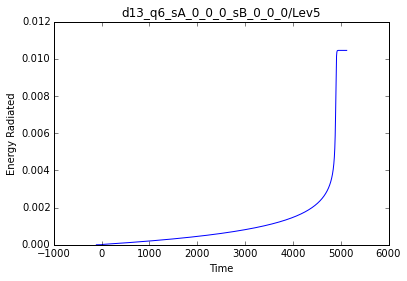

In [8]:
print("Mass Ratio: {}".format(metadata.initial_mass1/metadata.initial_mass2))
print("Initial Spin1: {}".format(metadata.initial_spin1))
print("Initial Spin2: {}".format(metadata.initial_spin2))
print("Final Mass of Blackhole Calculated : {}".format(final_mass))
print("Error from Horizon Data : {} %".format(np.abs(((final_mass-metadata.remnant_mass)/metadata.remnant_mass)*100)))

plt.figure(1)
plt.title(metadata.simulation_name)
plt.xlabel("Time")
plt.ylabel("Energy Radiated")
plt.plot(t[1:],np.real(E))
if(savefig):
    plt.savefig('images/'+metadata.alt_name +'_E')
plt.show()

